Подобрать модель ARIMA. 
Защитить модель перед преподавателем (Аббакумов). 
Построить прогноз на 4 наблюдения вперед.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
test = {}
train = {}
M3C = pd.ExcelFile('M3C.xls')
for sheet in 'M3Year M3Quart M3Month M3Other'.split():
    M3Year = M3C.parse(sheet).to_numpy()
    for row in M3Year:
        series = row[0]
        N = row[1]
        NF = row[2]
        train[series] = row[6:6+N-NF]
        test[series] = row[6+N-NF:6+N]

### N 346

In [4]:
data_346 = pd.DataFrame(train['N 346'])

In [5]:
data_346

,0
0,295.0
1,520.0
2,550.0
3,610.0
4,775.0
5,885.0
6,965.0
7,475.0
8,875.0
9,1330.0


In [6]:
data_346[0] = pd.to_numeric(data_346[0])

<AxesSubplot:>

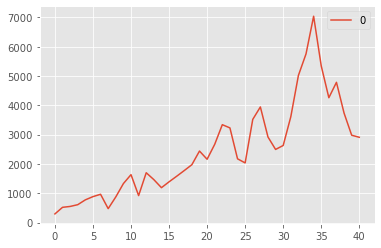

In [7]:
data_346.plot()

AutoCorrelation: убывание (неочевидно, что в геометрической прогрессии)</br>
Partial AutoCorrelation: лаг 1 </br>
Делаем вывод, что нужно посмотреть на **ARIMA(1,0,0)**: $x_{k} = a \cdot x_{k-1} + b + ε_{k}$</br>
А также **ARIMA(0,1,0)**

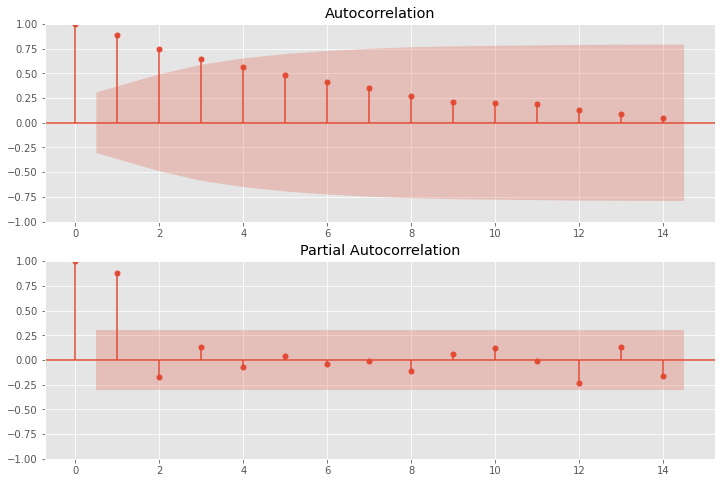

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data_346, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_346, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [9]:
data_346_diff = data_346.diff(periods=1)

In [10]:
data_346_diff = data_346_diff.dropna()

Посмотрим на ACF и PACF разностей (белый шум):

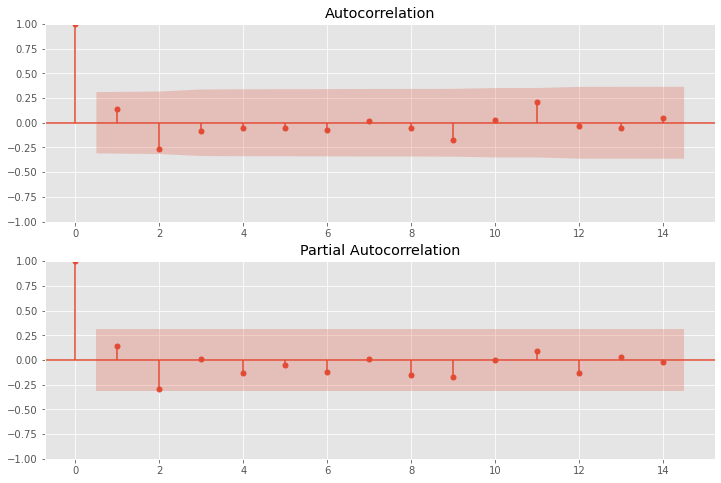

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data_346_diff, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_346_diff, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [12]:
# Строим модель ARIMA(1,0,0):
model_346 = ARIMA(data_346, order=(1,0,0))
model_fit_346 = model_346.fit()
print(model_fit_346.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   41
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -326.117
Date:                Mon, 01 Apr 2024   AIC                            658.233
Time:                        17:40:15   BIC                            663.374
Sample:                             0   HQIC                           660.105
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2434.9704    870.120      2.798      0.005     729.567    4140.374
ar.L1          0.9046      0.050     17.977      0.000       0.806       1.003
sigma2      4.558e+05   1.05e+05      4.356      0.0

In [13]:
# Строим модель ARIMA(0,1,0)
model_346_diff = ARIMA(data_346, order=(0,1,0))
model_fit_346_diff = model_346_diff.fit()
print(model_fit_346_diff.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   41
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -318.318
Date:                Mon, 01 Apr 2024   AIC                            638.636
Time:                        17:40:15   BIC                            640.325
Sample:                             0   HQIC                           639.247
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.78e+05   1.07e+05      4.484      0.000    2.69e+05    6.87e+05
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.34   Pr

Проверка гипотезы о равенстве коэффициента 0: P>|z| </br>
В данных моделях все не равны 0.

Посмотрим на значения критерия качества моделей. </br>
**Log Likelihood** (логарифмическая функция правдоподобия): показывает максимальное значение логарифмической функции правдоподобия, которое было достигнуто для данной модели. Чем выше это значение, тем лучше модель соответствует данным. </br>
**AIC (Критерий информационного критерия Акаике)**: используется для сравнения статистических моделей. Он учитывает сложность модели (число параметров) и ее пригодность к данным. Чем ниже значение AIC, тем лучше модель.</br>
**BIC (Критерий информационного критерия Байеса)**: используется для сравнения статистических моделей. BIC штрафует модели за большее количество параметров сильнее, чем AIC.

Так как при сравнении показателей двух моделей разница в критериях >10, то будем рассматривать ARIMA(0,1,0), так как в ее случае значения AIC и BIC ниже.

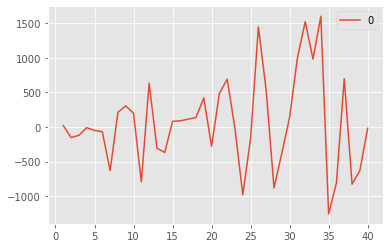

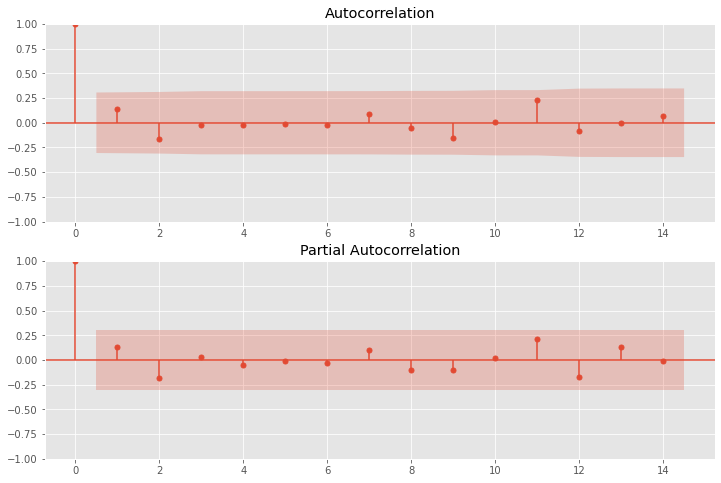

In [14]:
# Остатки ARIMA(1,0,0) - белый шум:
residuals_346 = pd.DataFrame(model_fit_346.resid)
residuals_346[1:].plot()
plt.show()

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_346, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_346, method='ywmle', lags=14, ax=plt.gca())
plt.show()

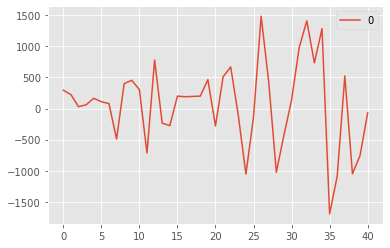

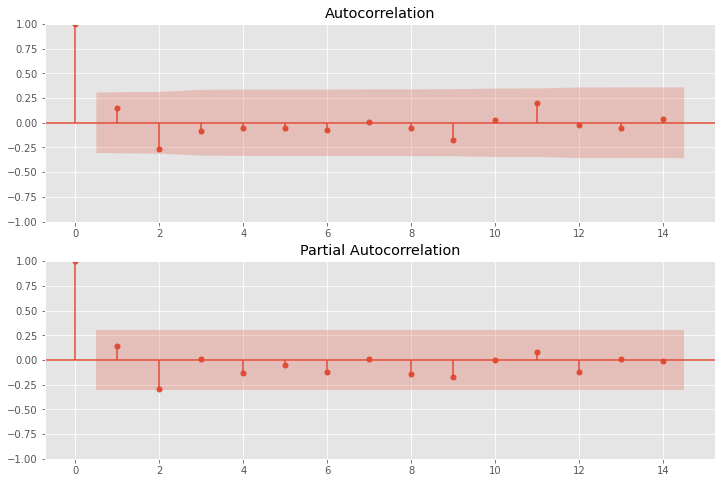

In [15]:
# Остатки ARIMA(0,1,0) - белый шум:
residuals_346_diff = pd.DataFrame(model_fit_346_diff.resid)
residuals_346_diff.plot()
plt.show()

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_346_diff, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_346_diff, method='ywmle', lags=14, ax=plt.gca())
plt.show()

346 ряд - ARIMA(0,1,0)

In [16]:
# Прогноз ARIMA(0,1,0):
data_fit_346 = model_fit_346_diff.predict(0, (41+4))
data_fit_346

0        0.0
1      295.0
2      520.0
3      550.0
4      610.0
5      775.0
6      885.0
7      965.0
8      475.0
9      875.0
10    1330.0
11    1635.0
12     920.0
13    1700.0
14    1465.0
15    1190.0
16    1390.0
17    1580.0
18    1775.0
19    1975.0
20    2440.0
21    2160.0
22    2670.0
23    3340.0
24    3230.0
25    2175.0
26    2035.0
27    3520.0
28    3945.0
29    2920.0
30    2495.0
31    2630.0
32    3610.0
33    5020.0
34    5755.0
35    7040.0
36    5345.0
37    4260.0
38    4785.0
39    3735.0
40    2980.0
41    2910.0
42    2910.0
43    2910.0
44    2910.0
45    2910.0
Name: predicted_mean, dtype: float64

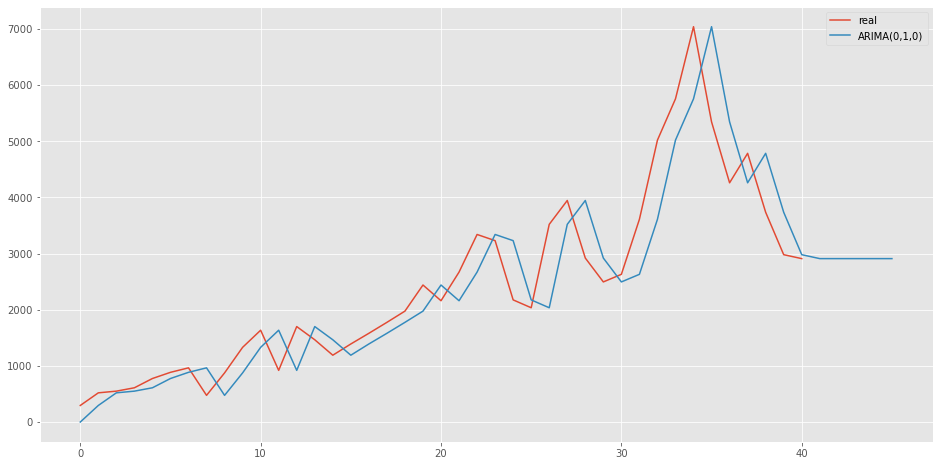

In [17]:
# График прогноза ARIMA(0,1,0) и исходного ряда:
plt.figure(figsize=(16,8))
plt.plot(data_346, label='real')
plt.plot(data_fit_346, label='ARIMA(0,1,0)')
plt.legend(loc='best')
plt.show()

### Auto_ARIMA

In [58]:
model_auto_346 = pm.auto_arima(data_346)

In [59]:
model_auto_3000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -334.212
Date:                Mon, 01 Apr 2024   AIC                            672.424
Time:                        17:51:04   BIC                            676.645
Sample:                             0   HQIC                           674.078
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6829      0.078     -8.719      0.000      -0.836      -0.529
sigma2      3308.4208    390.213      8.479      0.000    2543.618    4073.224
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                88.26
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model_auto_fit_346 = model_auto_346.fit(data_346)

In [62]:
# Прогноз ARIMA(0, 2, 1):
data_auto_fit_346 = model_auto_fit_346.predict(4)
data_auto_fit_346

41    2910.0
42    2910.0
43    2910.0
44    2910.0
dtype: float64

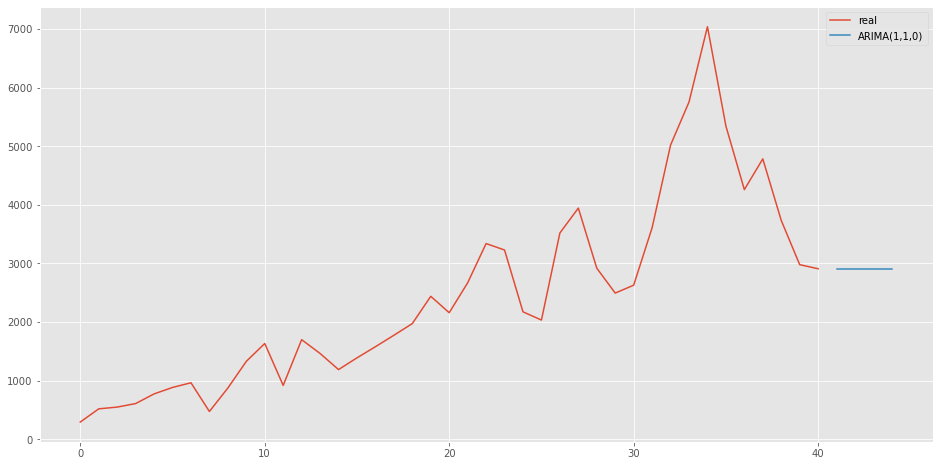

In [63]:
# График прогноза ARIMA(0, 2, 1) и исходного ряда:
plt.figure(figsize=(16,8))
plt.plot(data_346, label='real')
plt.plot(data_auto_fit_346, label='ARIMA(1,1,0)')
plt.legend(loc='best')
plt.show()

### N 197

In [18]:
data_197 = pd.DataFrame(train['N 197'])
data_197

,0
0,1495.0
1,1595.0
2,1570.0
3,1670.0
4,1805.0
5,2045.0
6,2390.0
7,2285.0
8,2020.0
9,2530.0


In [19]:
data_197[0] = pd.to_numeric(data_197[0])

<AxesSubplot:>

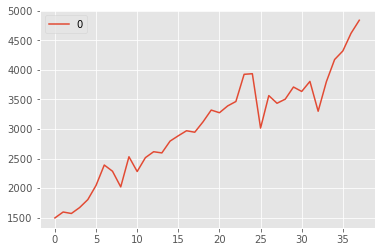

In [20]:
data_197.plot()

In [21]:
data_197 = data_197.dropna()

AutoCorrelation: убывание (неочевидно, что в геометрической прогрессии)</br>
Partial AutoCorrelation: лаг 1 </br>
Делаем вывод, что нужно посмотреть на **ARIMA(1,0,0)**: $x_{k} = a \cdot x_{k-1} + b + ε_{k}$</br>
А также **ARIMA(1,1,0)**, **ARIMA(0,1,1)**, **ARIMA(1,1,1)**

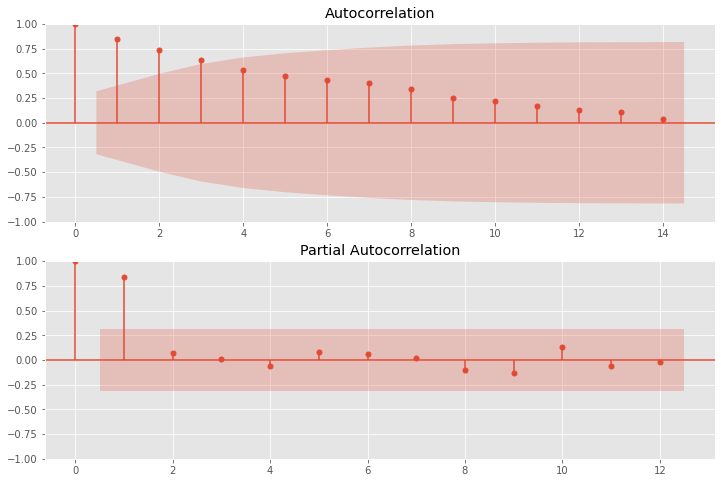

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data_197, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_197, method='ywmle', lags=12, ax=plt.gca())
plt.show()

In [23]:
data_197_diff = data_197.diff(periods=1)

In [24]:
data_197_diff = data_197_diff.dropna()

Посмотрим на ACF и PACF разностей:

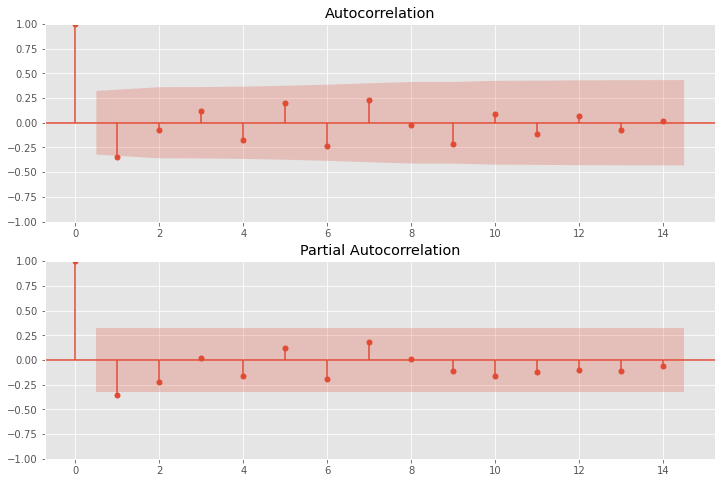

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data_197_diff, lags=14, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_197_diff, method='ywmle', lags=14, ax=plt.gca())
plt.show()

На первом лаге ACF и PACF видим выход за рамки доверительного интервала, поэтому также рассмотрим ARIMA(1,1,0), ARIMA(0,1,1), ARIMA(1,1,1):

In [26]:
# Строим модель ARIMA(1,0,0):
model_197_1 = ARIMA(data_197, order=(1,0,0))
model_fit_197_1 = model_197_1.fit()
print(model_fit_197_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   38
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -270.746
Date:                Mon, 01 Apr 2024   AIC                            547.492
Time:                        17:40:17   BIC                            552.405
Sample:                             0   HQIC                           549.240
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3030.6396   1073.197      2.824      0.005     927.212    5134.067
ar.L1          0.9769      0.066     14.910      0.000       0.849       1.105
sigma2      8.336e+04   1.83e+04      4.557      0.0

Значение ar.L1 близко к единице (0.9769).

In [27]:
# !!!Строим модель ARIMA(1,1,0):
model_197_2 = ARIMA(data_197, order=(1,1,0))
model_fit_197_2 = model_197_2.fit()
print(model_fit_197_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   38
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -261.272
Date:                Mon, 01 Apr 2024   AIC                            526.545
Time:                        17:40:17   BIC                            529.766
Sample:                             0   HQIC                           527.680
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2194      0.154     -1.424      0.155      -0.521       0.083
sigma2      7.937e+04   1.43e+04      5.565      0.000    5.14e+04    1.07e+05
Ljung-Box (L1) (Q):                   1.37   Jarque-

In [28]:
# Строим модель ARIMA(1,1,1):
model_197_3 = ARIMA(data_197, order=(1,1,1))
model_fit_197_3 = model_197_3.fit()
print(model_fit_197_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.263
Date:                Mon, 01 Apr 2024   AIC                            528.526
Time:                        17:40:17   BIC                            533.359
Sample:                             0   HQIC                           530.230
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1636      0.919     -0.178      0.859      -1.965       1.638
ma.L1         -0.0598      0.946     -0.063      0.950      -1.915       1.795
sigma2      7.933e+04   2.14e+04      3.713      0.0

In [29]:
# Строим модель ARIMA(0,1,1):
model_197_4 = ARIMA(data_197, order=(0,1,1))
model_fit_197_4 = model_197_4.fit()
print(model_fit_197_4.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -261.322
Date:                Mon, 01 Apr 2024   AIC                            526.645
Time:                        17:40:17   BIC                            529.867
Sample:                             0   HQIC                           527.781
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2026      0.160     -1.267      0.205      -0.516       0.111
sigma2      7.961e+04    1.6e+04      4.988      0.000    4.83e+04    1.11e+05
Ljung-Box (L1) (Q):                   1.70   Jarque-

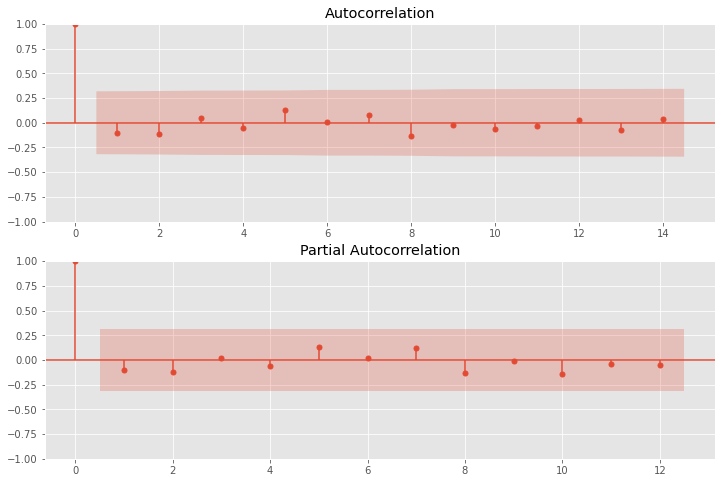

In [30]:
# Остатки ARIMA(1,1,0):
residuals_190_2 = pd.DataFrame(model_fit_197_2.resid)

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_190_2, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_190_2, method='ywmle', lags=12, ax=plt.gca())
plt.show()

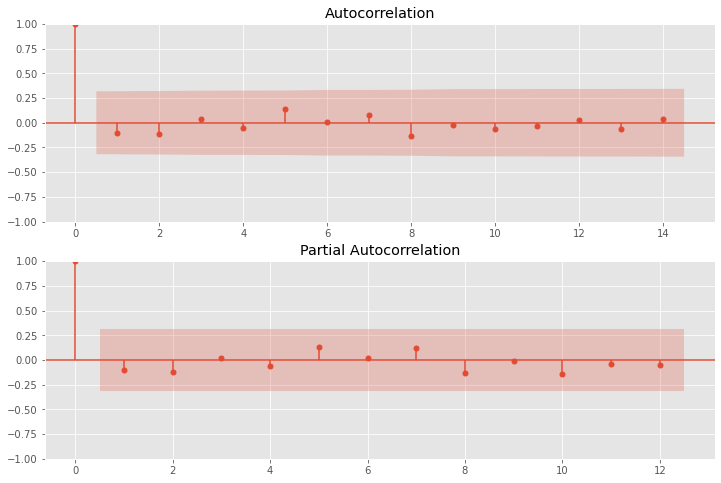

In [31]:
# Остатки ARIMA(1,1,1):
residuals_190_3 = pd.DataFrame(model_fit_197_3.resid)

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_190_3, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_190_3, method='ywmle', lags=12, ax=plt.gca())
plt.show()

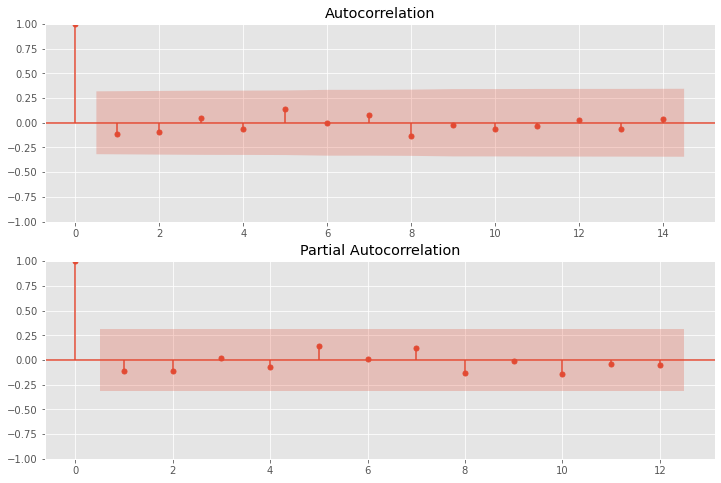

In [32]:
# Остатки ARIMA(0,1,1):
residuals_190_4 = pd.DataFrame(model_fit_197_4.resid)

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_190_4, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_190_4, method='ywmle', lags=12, ax=plt.gca())
plt.show()

Так как при сравнении показателей трех моделей разница в критериях незначительна, но они меньше у модели ARIMA(1,1,0), то рассмотрим ее:

In [50]:
# Прогноз ARIMA(0,1,1):
data_fit_197 = model_fit_197_4.predict(0, (38+4))
data_fit_197

0        0.000000
1     1472.726456
2     1571.129727
3     1570.228593
4     1649.782792
5     1773.545655
6     1989.990382
7     2308.938935
8     2289.851172
9     2074.684744
10    2437.731369
11    2311.963914
12    2473.855185
13    2586.397315
14    2593.256685
15    2754.117163
16    2858.476882
17    2947.400086
18    2945.486372
19    3084.635199
20    3272.303843
21    3274.453630
22    3366.584783
23    3445.056374
24    3827.740484
25    3913.264096
26    3197.031236
27    3490.431942
28    3446.233161
29    3493.091030
30    3666.043876
31    3641.290973
32    3771.824727
33    3395.614239
34    3718.052119
35    4082.400521
36    4271.850990
37    4549.448372
38    4781.120354
39    4781.120354
40    4781.120354
41    4781.120354
42    4781.120354
Name: predicted_mean, dtype: float64

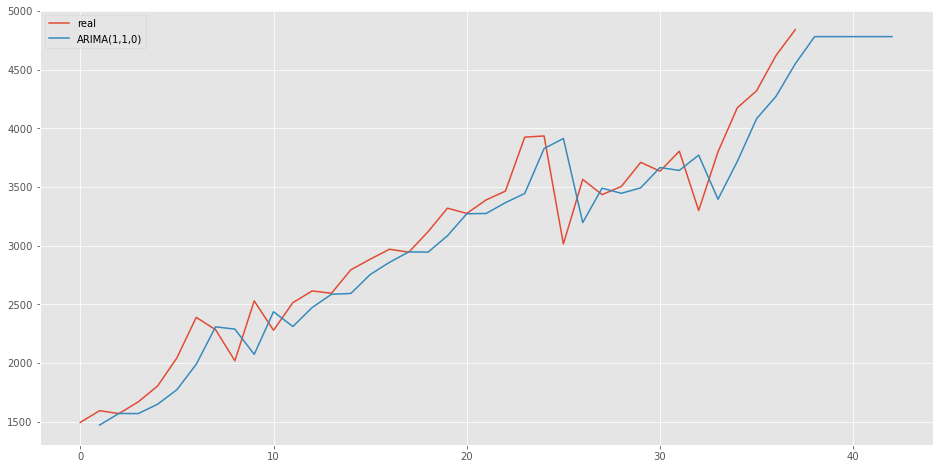

In [51]:
# График прогноза ARIMA(0,1,1) и исходного ряда:
plt.figure(figsize=(16,8))
plt.plot(data_197, label='real')
plt.plot(data_fit_197[1:], label='ARIMA(0,1,1)')
plt.legend(loc='best')
plt.show()

### Auto_ARIMA

In [35]:
import pmdarima as pm

In [48]:
model_auto_197 = pm.auto_arima(data_197)

In [49]:
model_auto_197.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -256.966
Date:                Mon, 01 Apr 2024   AIC                            519.932
Time:                        17:42:55   BIC                            524.765
Sample:                             0   HQIC                           521.636
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     87.5675     28.895      3.031      0.002      30.934     144.201
ma.L1         -0.4779      0.212     -2.254      0.024      -0.894      -0.062
sigma2      6.265e+04   1.17e+04      5.373      0.000    3.98e+04    8.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                45.17
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -1.62
Prob(H) (two-sided):                  0.25   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### N 3000

In [37]:
data_3000 = pd.DataFrame(train['N3000'])
data_3000[0] = pd.to_numeric(data_3000[0])

<AxesSubplot:>

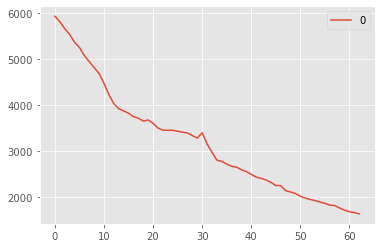

In [38]:
data_3000.plot()

Сразу делаю вывод, что буду брать разность, так как убывание ACF идет медленно:

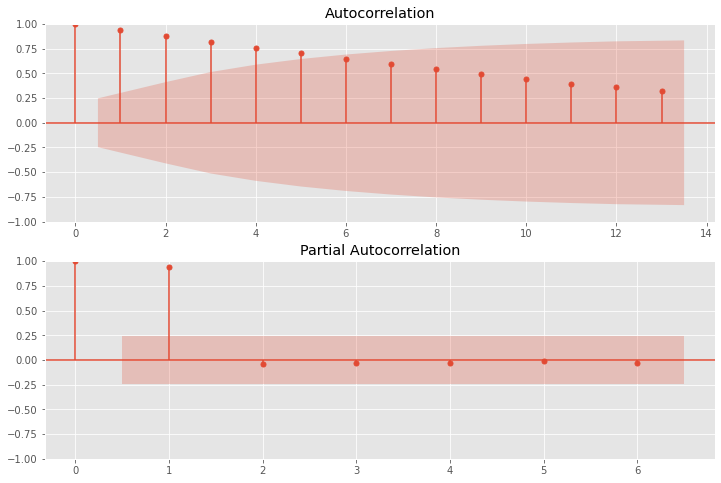

In [39]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(data_3000, lags=13, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_3000, method='ywmle', lags=6, ax=plt.gca())
plt.show()

In [40]:
#  Перейдем к разностям
data_3000_diff = data_3000.diff(periods=1, axis=0)

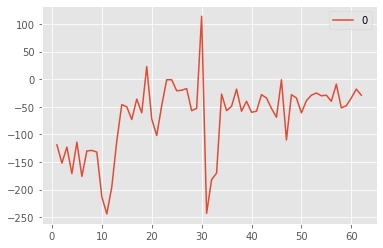

In [41]:
# График разностей:
data_3000_diff.plot()
plt.show()

In [42]:
data_3000_diff = data_3000_diff.dropna()

AutoCorrelation: быстрое убывание в геометрической прогрессии </br>
Partial AutoCorrelation: лаг 1 </br>
Делаем вывод, что нужно посмотреть на **ARIMA(1,1,0)**:

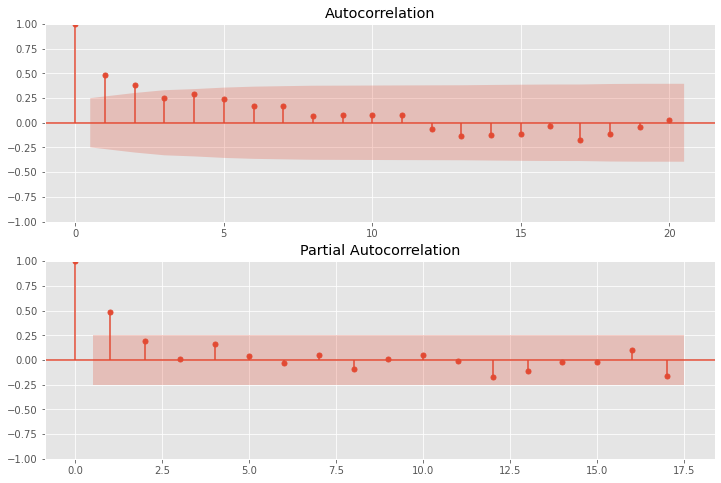

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(211)

plot_acf(data_3000_diff, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(data_3000_diff, method='ywmle', lags=17, ax=plt.gca())
plt.show()

In [44]:
# строим модель
model_3000 = ARIMA(data_3000, order=(1,1,0))
model_fit_3000 = model_3000.fit()
print(model_fit_3000.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   63
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -345.660
Date:                Mon, 01 Apr 2024   AIC                            695.320
Time:                        17:40:23   BIC                            699.574
Sample:                             0   HQIC                           696.990
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7438      0.100      7.468      0.000       0.549       0.939
sigma2      3933.5644    382.772     10.277      0.000    3183.345    4683.783
Ljung-Box (L1) (Q):                   6.53   Jarque-

Проверка гипотезы о равенстве коэффициента 0: P>|z| </br>
В данной модели все не равны 0.

Вывод для 3000 ряда  <br> 
ARIMA(1,1,0)

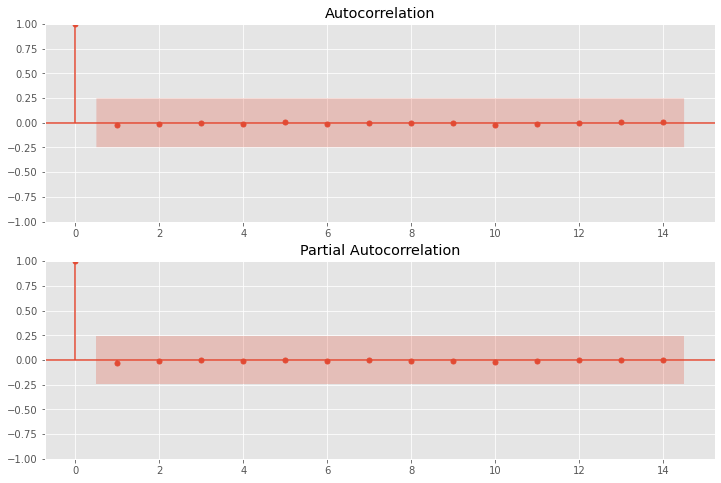

In [45]:
# Остатки ARIMA(1,1,0):
residuals_3000 = pd.DataFrame(model_fit_3000.resid)

plt.figure(figsize=(12,8))

plt.subplot(211)
plot_acf(residuals_3000, lags=14, ax=plt.gca())

plt.subplot(212)
plot_pacf(residuals_3000, method='ywmle', lags=14, ax=plt.gca())
plt.show()

In [46]:
# Прогноз ARIMA(1,1,0):
data_fit_3000 = model_fit_3000.predict(0, (63+4))
data_fit_3000

0        0.000000
1     5965.481428
2     5719.484457
3     5542.938130
4     5441.509145
         ...     
63    1612.428985
64    1596.383859
65    1584.449043
66    1575.571591
67    1568.968293
Name: predicted_mean, Length: 68, dtype: float64

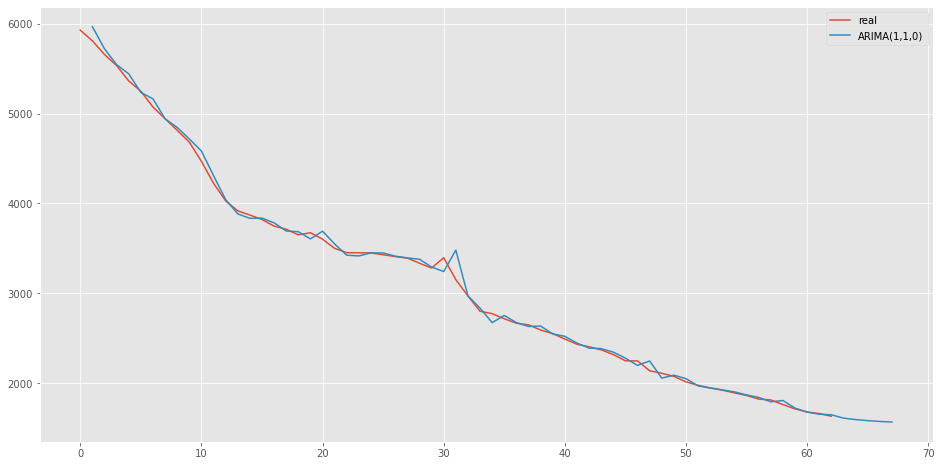

In [47]:
# График прогноза и исходного ряда:
plt.figure(figsize=(16,8))
plt.plot(data_3000, label='real')
plt.plot(data_fit_3000[1:], label='ARIMA(1,1,0)')
plt.legend(loc='best')
plt.show()

### Auto_ARIMA

In [52]:
model_auto_3000 = pm.auto_arima(data_3000)

In [53]:
model_auto_3000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -334.212
Date:                Mon, 01 Apr 2024   AIC                            672.424
Time:                        17:45:16   BIC                            676.645
Sample:                             0   HQIC                           674.078
                                 - 63                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6829      0.078     -8.719      0.000      -0.836      -0.529
sigma2      3308.4208    390.213      8.479      0.000    2543.618    4073.224
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                88.26
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
model_auto_fit_3000 = model_auto_3000.fit(data_3000)

In [56]:
# Прогноз ARIMAX(0, 2, 1):
data_auto_fit_3000 = model_auto_fit_3000.predict(4)
data_auto_fit_3000

63    1603.48818
64    1572.97636
65    1542.46454
66    1511.95272
dtype: float64

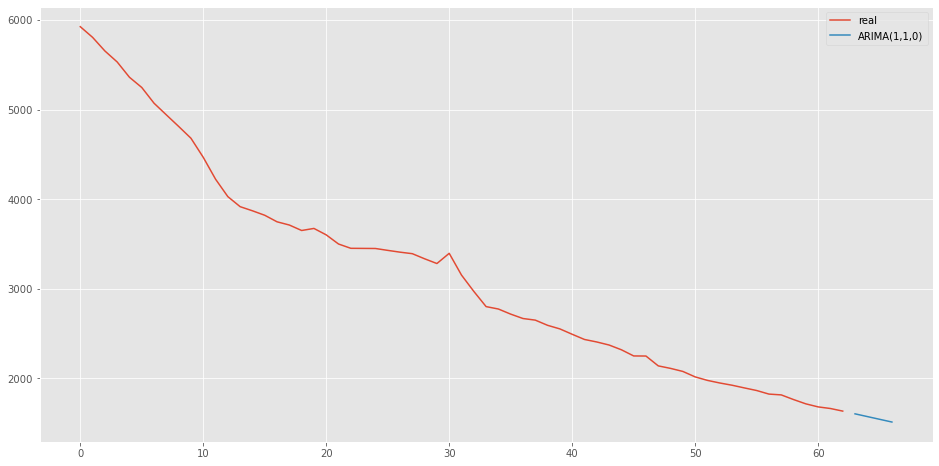

In [57]:
# График прогноза ARIMAX(0, 2, 1) и исходного ряда:
plt.figure(figsize=(16,8))
plt.plot(data_3000, label='real')
plt.plot(data_auto_fit_3000, label='ARIMA(1,1,0)')
plt.legend(loc='best')
plt.show()